In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline
import pandas as pd

# Load data
completeData = pd.read_csv("house_data_complete.csv")
trainingData = pd.read_csv("house_prices_data_training_data.csv")

In [2]:
# Clean the data
trainingData = trainingData.dropna(axis = 'rows')
completeData = completeData.dropna(axis = 'rows')

#corr = trainingData.corr()
#sns.heatmap(corr)

In [3]:
def  featureNormalize(X):
    
    X_norm = X.copy()

    mu = np.mean(X)
    X_norm = X - mu

    sigma = np.std(X_norm)
    X_norm = X_norm / sigma
   
    return X_norm

Text(0.5, 0, 'Number of bathrooms')

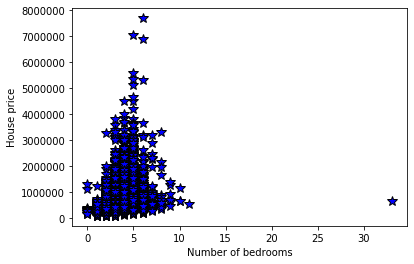

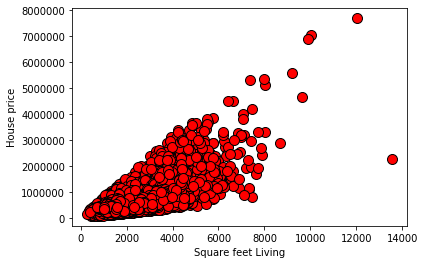

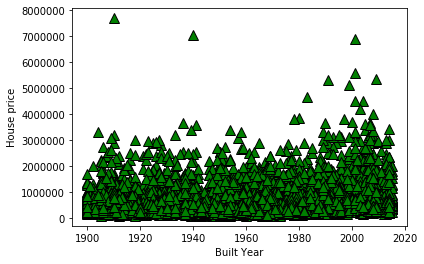

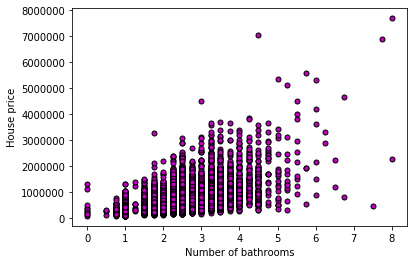

In [4]:
# Visualize the data

price = completeData['price']
bedrooms = completeData['bedrooms']

fig = plt.figure()
plt.plot(bedrooms, price, 'b*', ms=10, mec='k')
plt.ylabel('House price')
plt.xlabel('Number of bedrooms')

sqftLiving = completeData['sqft_living']

fig = plt.figure()
plt.plot(sqftLiving, price, 'ro', ms=10, mec='k')
plt.ylabel('House price')
plt.xlabel('Square feet Living')

yrBuilt = completeData['yr_built']

fig = plt.figure()
plt.plot(yrBuilt, price, 'g^', ms=10, mec='k')
plt.ylabel('House price')
plt.xlabel('Built Year')

bathrooms = completeData['bathrooms']

fig = plt.figure()
plt.plot(bathrooms, price, 'm.', ms=10, mec='k')
plt.ylabel('House price')
plt.xlabel('Number of bathrooms')


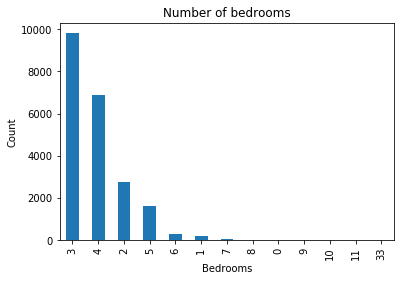

<Figure size 720x720 with 0 Axes>

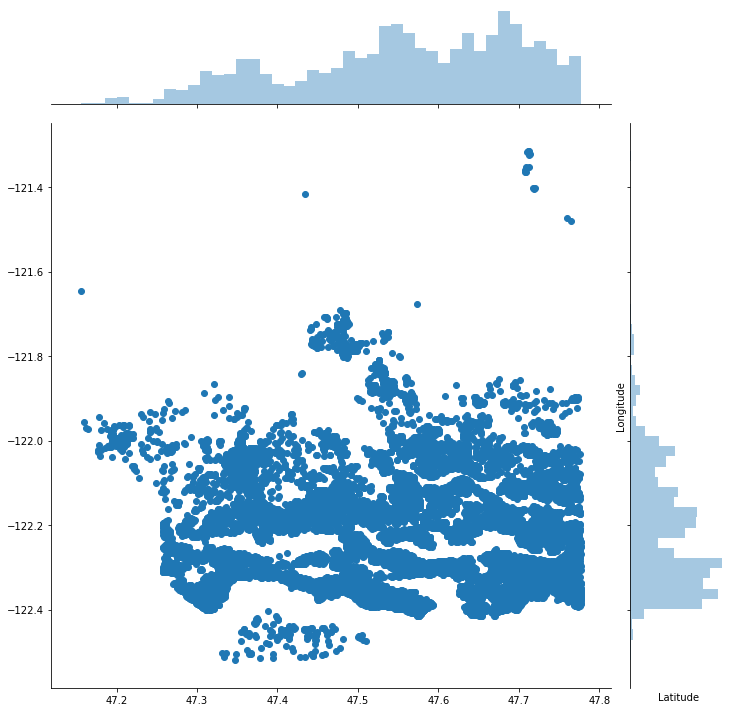

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [5]:
# Visualizing

bedrooms.value_counts().plot(kind='bar')
plt.title('Number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

plt.figure(figsize=(10,10))
sns.jointplot(x=completeData.lat.values,y=completeData.long.values, height=10)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()
sns.despine

In [6]:
def computeCostMulti(X, y, theta, lambda_):

    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    sq_error = np.sum(np.square(h - y))
    J1 = (sq_error) / (2 * m)
    J = J1 + ( lambda_ / (2 * m) )* (np.sum(np.power(theta,2)))
    
    return J

In [7]:
def gradientDescentMulti(X, y, theta, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = np.dot(X, theta)                
        theta = theta - (alpha*(1.0 / m) * (((np.dot(np.transpose(X), (h - y)))) + lambda_*theta))
        J_history.append(computeCostMulti(X, y, theta, lambda_))
    
    return theta, J_history

In [8]:
def checkHypothesis(X1, y1, Xcv1, ycv1):

    X = X1.copy()
    y = y1.copy()
    Xcv = Xcv1.copy()
    ycv = ycv1.copy()
    
    alpha = 0.04
    num_iters = 100
    
    initial_theta = np.zeros(X.shape[1])
    
    lambda1_ = 0.04
    lambda2_ = 0.64
    lambda3_ = 2.56
    lambda4_ = 5.12
    
    theta1, J_history1 = gradientDescentMulti(X, y, initial_theta, alpha, num_iters, lambda1_)
    theta2, J_history2 = gradientDescentMulti(X, y, initial_theta, alpha, num_iters, lambda2_)
    theta3, J_history3 = gradientDescentMulti(X, y, initial_theta, alpha, num_iters, lambda3_)
    theta4, J_history4 = gradientDescentMulti(X, y, initial_theta, alpha, num_iters, lambda4_)

    ccost1 = computeCostMulti(Xcv, ycv, theta1, 0)
    ccost2 = computeCostMulti(Xcv, ycv, theta2, 0)
    ccost3 = computeCostMulti(Xcv, ycv, theta3, 0)
    ccost4 = computeCostMulti(Xcv, ycv, theta4, 0)
    
    min_ccost = min([ccost1, ccost2, ccost3, ccost4])
    
    if min_ccost == ccost1:
        lambda_ = lambda1_
        theta = theta1.copy()
        J_history = J_history1.copy()
    elif min_ccost == ccost2:
        lambda_ = lambda2_
        theta = theta2.copy()
        J_history = J_history2.copy()
    elif min_ccost == ccost3:
        lambda_ = lambda3_
        theta = theta3.copy()
        J_history = J_history3.copy()
    else:
        lambda_ = lambda4_
        theta = theta4.copy()
        J_history = J_history4.copy()
    
    return lambda_, theta, J_history

In [9]:
def hypothesisDegree(X, degree):
    
    X[2] = np.power((X[2]), degree)   #bathrooms
    X[9] = np.power((X[9]), degree)   #grade
    X[10] = np.power((X[10]), degree) #sqft_above
    X[14] = np.power((X[14]), degree) #lat
    X[16] = np.power((X[16]), degree) #sqft_living15
    
    return X   

In [10]:
def hypothesis(trainingData_Norm, crossValidation):
    # First hypothesis (linear)
    X = trainingData_Norm.copy()
    X = X.drop(["id", "date", "price", "zipcode"], axis=1)
    X = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
    X = pd.DataFrame(X)

    y = trainingData_Norm['price']

    Xcv = crossValidation.copy()
    Xcv = Xcv.drop(["id", "date", "price", "zipcode"], axis=1)
    Xcv = np.concatenate([np.ones((Xcv.shape[0],1)), Xcv], axis=1)
    Xcv = pd.DataFrame(Xcv)

    ycv = crossValidation['price']

    lambda1, theta1, J_history1 = checkHypothesis(X, y, Xcv, ycv)
    
    plt.plot(np.arange(len(J_history1))+1, J_history1)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.title('Output of the first hypothesis')

    # Second hypothesis (Quadratic)
    X2 = hypothesisDegree(X, 2)
    Xcv2 = hypothesisDegree(Xcv, 2)
    
    lambda2, theta2, J_history2 = checkHypothesis(X2, y, Xcv2, ycv)
    fig = plt.figure()
    plt.plot(np.arange(len(J_history2))+1, J_history2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.title('Output of the second hypothesis')

    # Third hypothesis (Less Features)

    X = trainingData_Norm.copy()
    X = X.drop(["id", "date", "price", "zipcode", "floors", "waterfront", "condition", "yr_renovated", "long", "view"], axis=1)
    X = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
    X3 = pd.DataFrame(X)
    
    Xcv = crossValidation.copy()
    Xcv = Xcv.drop(["id", "date", "price", "zipcode", "floors", "waterfront", "condition", "yr_renovated", "long", "view"], axis=1)
    Xcv3= np.concatenate([np.ones((Xcv.shape[0],1)), Xcv], axis=1)
    Xcv3 = pd.DataFrame(Xcv3)
    #X3 =hypothesisDegree(X, 3)
    #Xcv3 = hypothesisDegree(Xcv, 3)
    
    lambda3, theta3, J_history3 = checkHypothesis(X3, y, Xcv3, ycv)
    fig = plt.figure()
    plt.plot(np.arange(len(J_history3))+1, J_history3)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.title('Output of the third hypothesis')

    print(lambda1, lambda2, lambda3)
    
    return theta1, theta2, theta3

In [11]:
def test(testing, theta1, theta2, theta3):   
    X = testing.copy()
    X = X.drop(["id", "date", "price", "zipcode"], axis=1)
    X3 = X.drop(["floors", "waterfront", "condition", "yr_renovated", "long", "view"], axis=1)
    X = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
    X = pd.DataFrame(X)
    X2 = hypothesisDegree(X, 2)
    X3 = np.concatenate([np.ones((X3.shape[0],1)), X3], axis=1)
    X3 = pd.DataFrame(X3)
    y = testing['price']

    m = y.shape[0]
    J = 0
    h1 = np.dot(X, theta1)
    J1 = (np.sum(np.square(h1 - y))) / (2 * m)
    
    h2 = np.dot(X2, theta2)
    J2 = (np.sum(np.square(h2 - y))) / (2 * m)
    
    h3 = np.dot(X3, theta3)
    J3 = (np.sum(np.square(h3 - y))) / (2 * m)
    
    return h1, J1, h2, J2, h3, J3

In [12]:
# Normalize
completeData_Norm = completeData.copy()

for i in range(completeData.shape[1]):
    if i > 2 and i != 16 :
        completeData_Norm.iloc[:,i] = featureNormalize(completeData.iloc[:,i])


0.04 0.04 0.04
[1089787.52307647  514124.89628767  415240.7163249  ...  619731.82069915
  404184.11984869  622315.58190396]
84465236527.71373
[721375.12499476 418123.5512384  325012.97736702 ... 346814.20936835
 307107.01047073 348316.40787501]
29252968002.542747
[835095.34820844 255432.26153093 359224.86520426 ...  83187.70771262
 329669.38829686  86679.96413932]
28325821577.20232


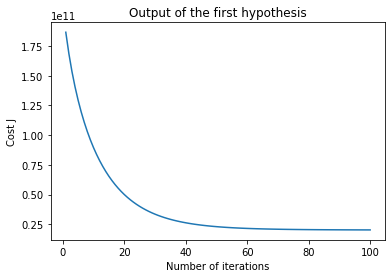

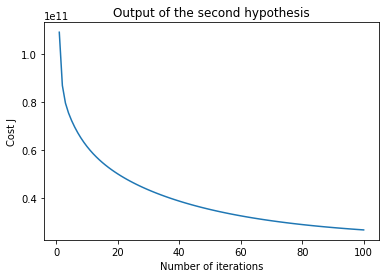

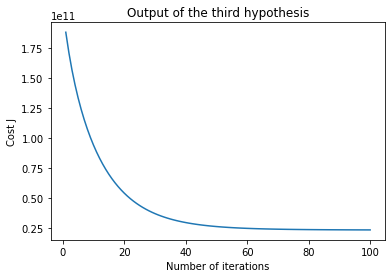

In [13]:
# Divide the data (Training, CV, Testing)
rowsComplete = completeData.shape[0]
rowsTraining = trainingData.shape[0]
rows=(rowsComplete-rowsTraining)//2

trainingData_Norm = completeData_Norm.iloc[0:rowsTraining]
crossValidation = completeData_Norm.iloc[rowsTraining:rowsTraining+rows]
testing = completeData_Norm.iloc[rowsTraining+rows:rowsComplete+1]

theta1, theta2, theta3 = hypothesis(trainingData_Norm, crossValidation)

predicted1, error1, predicted2, error2, predicted3, error3 = test(testing, theta1, theta2, theta3)

print(predicted1)
print(error1)
print(predicted2)
print(error2)
print(predicted3)
print(error3)
    

0.04 0.04 0.04
[ 645565.62658036 1588945.11079614  855017.03247859 ... 1028030.14307345
  404854.21280114  518581.12938611]
111619666092.9139
[369015.27852903 557454.92976522 531396.98366535 ... 828896.13525382
 299653.24953428 433012.44894999]
29281660651.661983
[635470.49723902 163626.8338181  758754.50532361 ... 764911.04473997
 235324.71327066 329130.26439894]
26026231859.026108


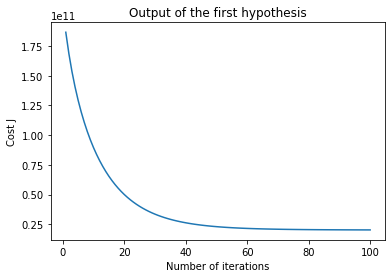

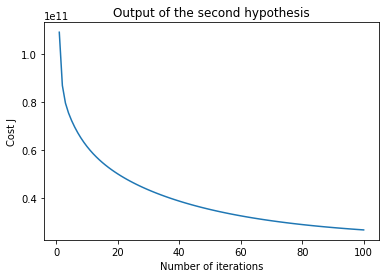

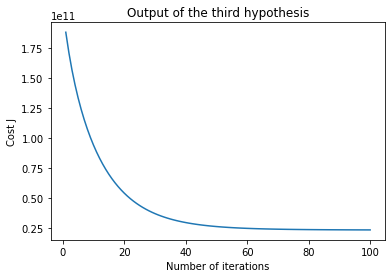

In [14]:
# Divide the data (Training, Testing, CV)
trainingData_Norm = completeData_Norm.iloc[0:rowsTraining]
testing = completeData_Norm.iloc[rowsTraining:rowsTraining+rows]
crossValidation = completeData_Norm.iloc[rowsTraining+rows:rowsComplete+1]

theta1, theta2, theta3 = hypothesis(trainingData_Norm, crossValidation)

predicted1, error1, predicted2, error2, predicted3, error3 = test(testing, theta1, theta2, theta3)

print(predicted1)
print(error1)
print(predicted2)
print(error2)
print(predicted3)
print(error3)

0.04 0.04 0.04
[ 640373.7662196   833991.39352406 1041292.84689473 ...  565849.12444169
  538058.17784266  590275.88244816]
118987389843.98924
[282177.81161525 627077.97881478 329843.25185371 ... 458586.18319472
 307507.49778557 343270.1980715 ]
26969330178.464863
[259243.90131535 703205.28678249 426036.04914807 ... 354988.93086534
 506948.26543686 606063.1256234 ]
28394847028.195583


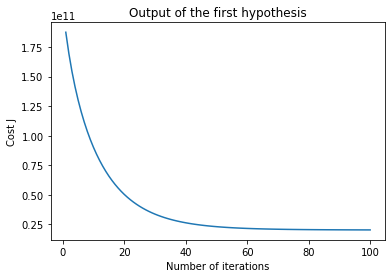

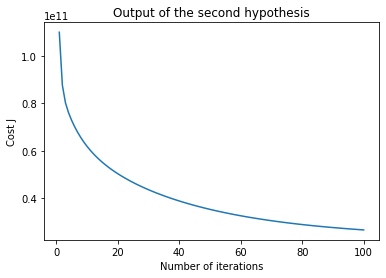

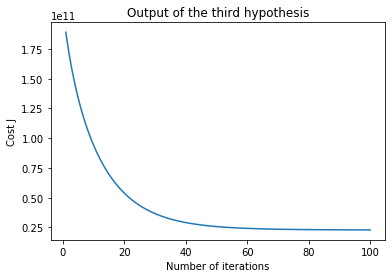

In [15]:
# Divide the data (Testing, Training, CV)
testing = completeData_Norm.iloc[0:rows]
trainingData_Norm = completeData_Norm.iloc[rows:rowsTraining+rows]
crossValidation = completeData_Norm.iloc[rowsTraining+rows:rowsComplete+1]

theta1, theta2, theta3 = hypothesis(trainingData_Norm, crossValidation)

predicted1, error1, predicted2, error2, predicted3, error3 = test(testing, theta1, theta2, theta3)

print(predicted1)
print(error1)
print(predicted2)
print(error2)
print(predicted3)
print(error3)

0.04 0.04 0.04
[1100459.87186182  522617.68520472  422867.85556223 ...  624769.83877349
  406284.91412951  627318.42958609]
85702544521.35172
[729597.80699839 424992.16738903 332573.54883798 ... 347436.6701161
 309230.5249092  348844.86903778]
28511234650.37423
[843096.71330568 262477.28787915 367330.60111835 ...  89952.68413474
 338485.78690468  93440.57108666]
27636350693.57285


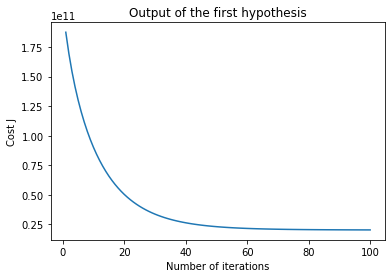

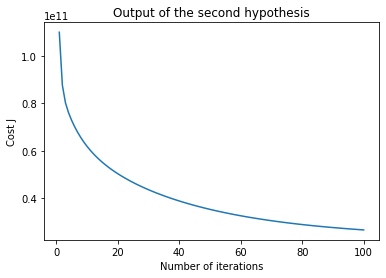

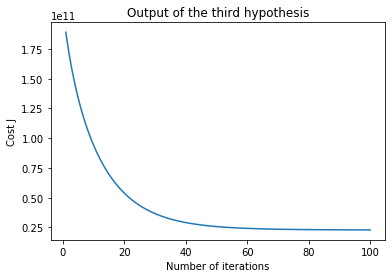

In [16]:
# Divide the data (CV, Training, Testing)
crossValidation = completeData_Norm.iloc[0:rows]
trainingData_Norm = completeData_Norm.iloc[rows:rowsTraining+rows]
testing = completeData_Norm.iloc[rowsTraining+rows:rowsComplete+1]

theta1, theta2, theta3 = hypothesis(trainingData_Norm, crossValidation)

predicted1, error1, predicted2, error2, predicted3, error3 = test(testing, theta1, theta2, theta3)

print(predicted1)
print(error1)
print(predicted2)
print(error2)
print(predicted3)
print(error3)

5.12 0.04 0.04
[ 978837.31583161 1580045.13614305  662803.01783887 ...  647469.61824115
  410868.54375578  650279.19975362]
120255229804.34686
[ 608967.54737087 1230075.20814514  262901.33305593 ...  321054.74208531
  298562.57508355  322722.35459721]
26944569757.908463
[ 718504.91538533 1148746.13009523  251125.36339474 ...   85802.98152611
  341083.28786651   89678.40768211]
23534485004.725346


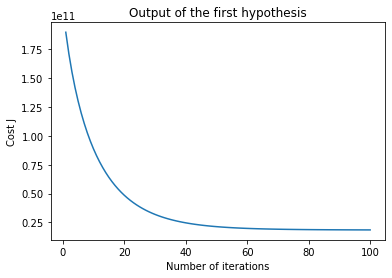

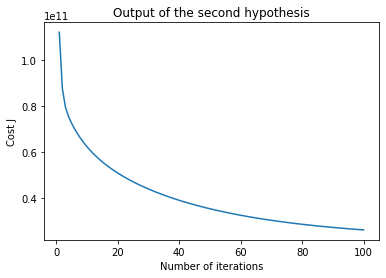

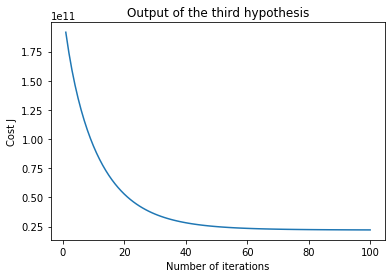

In [17]:
# Divide the data (CV, Testing, Training)
crossValidation = completeData_Norm.iloc[0:rows]
trainingData_Norm = completeData_Norm.iloc[rows:rows+rows]
testing = completeData_Norm.iloc[rows+rows:rowsComplete+1]

theta1, theta2, theta3 = hypothesis(trainingData_Norm, crossValidation)

predicted1, error1, predicted2, error2, predicted3, error3 = test(testing, theta1, theta2, theta3)

print(predicted1)
print(error1)
print(predicted2)
print(error2)
print(predicted3)
print(error3)

0.04 0.04 0.04
[ 623447.77580302  846058.64452339 1019275.2347449  ...  583538.0153917
  526859.19909295  589373.79369813]
116233563150.71341
[274298.96309138 629043.92667921 321633.00180457 ... 473148.37343992
 296180.6794186  350298.7762581 ]
27237088035.239017
[258889.64905868 708092.43590191 394967.46290113 ... 360044.15291526
 495823.81225462 620005.14162267]
28457149659.437458


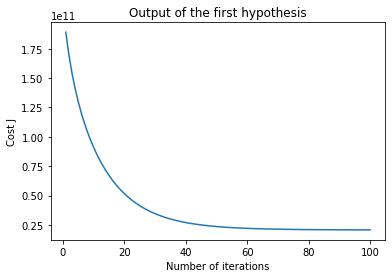

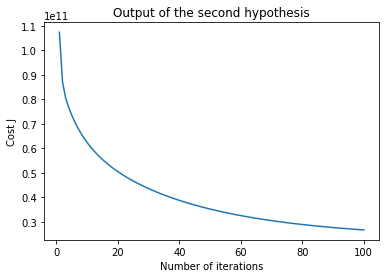

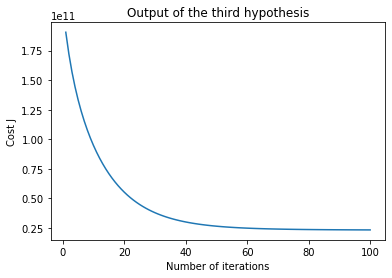

In [18]:
# Divide the data (Testing, CV, Training)
testing = completeData_Norm.iloc[0:rows]
crossValidation = completeData_Norm.iloc[rows:rows+rows]
trainingData_Norm = completeData_Norm.iloc[rows+rows:rowsComplete+1]

theta1, theta2, theta3 = hypothesis(trainingData_Norm, crossValidation)

predicted1, error1, predicted2, error2, predicted3, error3 = test(testing, theta1, theta2, theta3)

print(predicted1)
print(error1)
print(predicted2)
print(error2)
print(predicted3)
print(error3)